In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [15]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
print(df.shape)

(10000, 14)


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.duplicated().sum()

0

In [9]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [10]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [11]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [16]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [17]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [20]:
df = pd.get_dummies(df,columns = ['Geography','Gender'],drop_first = True)

In [21]:
X = df.drop(columns=['Exited'])
y = df['Exited']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 1)

In [22]:
X


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [23]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [27]:
X_test_scaled

array([[-1.03768121,  0.77498705, -1.0482813 , ..., -0.58312392,
        -0.57273139,  0.91509065],
       [ 0.30708683, -0.46686456, -0.70174202, ..., -0.58312392,
        -0.57273139,  0.91509065],
       [-1.23422423,  0.29735181, -1.0482813 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       ...,
       [-0.86182692, -0.46686456,  1.72403288, ..., -0.58312392,
         1.74601919,  0.91509065],
       [-0.30323097, -0.84897275, -1.0482813 , ...,  1.71490137,
        -0.57273139, -1.09278791],
       [ 0.04847759,  1.25262228,  1.3774936 , ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [29]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [30]:
model = Sequential()

In [72]:
model.add(Dense(20,activation='relu',input_dim = 11))
model.add(Dense(20,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [73]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 36        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
 dense_2 (Dense)             (None, 3)                 6         
                                                                 
 dense_3 (Dense)             (None, 3)                 12        
                                                                 
 dense_4 (Dense)             (None, 1)                 4         
                                                                 
 dense_5 (Dense)             (None, 11)                22        
                                                                 
 dense_6 (Dense)             (None, 11)                1

In [74]:
#Model Compilation

model.compile(loss = 'binary_crossentropy',optimizer = 'Adam' , metrics = ['accuracy'])

In [75]:
#Neural Network Train
history = model.fit(X_train_scaled,y_train,epochs = 100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 6s 7ms/step - loss: 0.5501 - accuracy: 0.7972 - val_loss: 0.5044 - val_accuracy: 0.7975
Epoch 2/100
200/200 [==============================] - 1s 6ms/step - loss: 0.5045 - accuracy: 0.7972 - val_loss: 0.5039 - val_accuracy: 0.7975
Epoch 3/100
200/200 [==============================] - 1s 5ms/step - loss: 0.5045 - accuracy: 0.7972 - val_loss: 0.5042 - val_accuracy: 0.7975
Epoch 4/100
200/200 [==============================] - 1s 5ms/step - loss: 0.5048 - accuracy: 0.7972 - val_loss: 0.5039 - val_accuracy: 0.7975
Epoch 5/100
200/200 [==============================] - 1s 5ms/step - loss: 0.5046 - accuracy: 0.7972 - val_loss: 0.5039 - val_accuracy: 0.7975
Epoch 6/100
200/200 [==============================] - 1s 5ms/step - loss: 0.5044 - accuracy: 0.7972 - val_loss: 0.5048 - val_accuracy: 0.7975
Epoch 7/100
200/200 [==============================] - 1s 5ms/step - loss: 0.5046 - accuracy: 0.7972 - val_loss: 0.5039 - val_accuracy: 0.7975

In [76]:
model.layers[0].get_weights()   #First Layer weights and biases

[array([[ 0.09449245,  0.23843607, -0.06830782],
        [-1.0011343 ,  1.0209928 ,  1.7826898 ],
        [ 0.09498736,  0.14906849,  0.12561733],
        [-0.20818345,  0.71418667,  0.25960195],
        [ 0.0962413 ,  0.16212009, -0.02457371],
        [-0.04585049, -0.12913787, -0.19854064],
        [ 0.7682986 , -0.145635  , -0.4883554 ],
        [ 0.05411154,  0.58450276,  0.07598991],
        [-0.5075442 ,  0.64636904,  0.2868283 ],
        [-0.20344517, -0.48896098, -0.40116888],
        [ 0.5174317 ,  0.00512868, -0.14770629]], dtype=float32),
 array([ 0.6919723 , -0.39605165, -0.5049896 ], dtype=float32)]

In [77]:
model.layers[1].get_weights()

[array([[-2.134736  ],
        [ 0.2974244 ],
        [ 0.78835976]], dtype=float32),
 array([-0.62777287], dtype=float32)]

In [78]:
y_log = model.predict(X_test_scaled)

63/63 [==============================] - 0s 2ms/step


In [79]:
y_pred = np.where(y_log>0.5,1,0)

In [80]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7925

In [81]:
import matplotlib.pyplot as plt

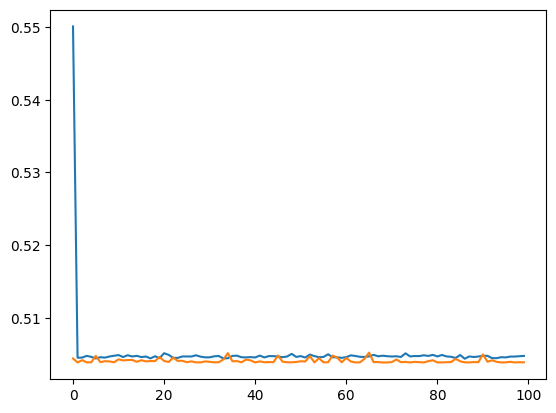

In [82]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

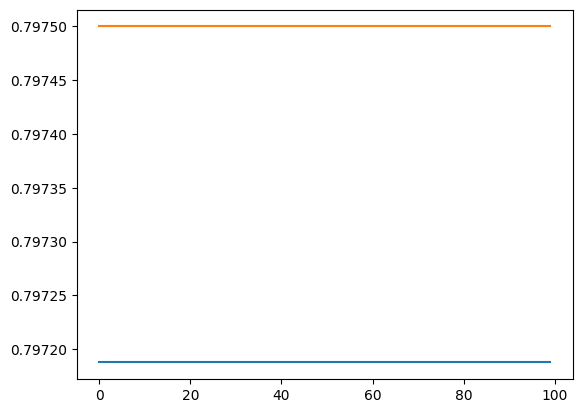

In [83]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])